# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [274]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [275]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [276]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [277]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [278]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [279]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [280]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=4, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=4)

In [281]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.09 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=4)

In [282]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))



```
# This is formatted as code
```

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [283]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(dim)
    b = 0.0

    return w,b

In [284]:
dim=X_train[0]
print("dim: ",dim)
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

dim:  [-0.39348337 -0.19771903 -0.15037836 -0.21528098 -1.28594363 -0.66049132
  0.04140556 -0.22680269 -0.511055   -0.42871073  0.4210912   0.22560347
 -0.6624427  -0.68888516  0.56015427]
w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0.0


<font color='cyan'>Grader function - 1 </font>

In [285]:
dim=X_train[0]
print(dim.shape) 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

(15,)


True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [286]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sig = 1/(1+np.exp(-z))
    return sig

<font color='cyan'>Grader function - 2</font>

In [287]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [288]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    #y_pred is nothing but a bounded relative measure of distance from the supposed plane(of Log Regrn(ws and b)). 
    #where measure like 0.99 means a pt far away from the plane in the direction of label(1), 0.002 means a pt far away from the plane in the direction of label(0)
    #and 0.5 means the pt is on the plane
    #log-loss penalises on 2 bases: 1. the farther away is good, so distance-measure like 0.99 an 0.002 ought to be penalised less. It is like 
    #"do you stay in north or south of equator?" The farther away you are from the equator surer you are to be not confused.[think of visiting kenya]
    #2. However, higher distance must be penalised when the device misclassified the one direction[South or North]
    #another way to look at it is that the sigmoid is probability of a point being 1 . we know that log-loss fn respects the respective probabs according to their labels
    #if a pt has probab of 0.03 for being classified as 1 , it is the same saying it is 0.97 probable to be classiffied as 0.
    #i.e, log-loss only once look at the label-value to understand which language too respect

    #we use this logic to make the code simpler as following

    adjusted_prob = []
    for i, item in enumerate(y_true):
      if item == 0:
        val = 1-y_pred[i] 
        adjusted_prob.append(val)
      else:
        #val = y_pred[i] 
        adjusted_prob.append(y_pred[i])
    loss = -np.sum(np.log10(adjusted_prob))/len(y_true)
    return loss

<font color='cyan'>Grader function - 3 </font>

In [289]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(loss==0.07644900402910389)
  return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [290]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w,x) + b
    dw = x*(y-sigmoid(z)) - alpha*w/N
    return dw

<font color='cyan'>Grader function - 4 </font>

In [291]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.sum(grad_dw)==2.613689585)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [292]:
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z = np.dot(w,x) + b
    db = y - sigmoid(z)
    return db

<font color='cyan'>Grader function - 5 </font>

In [293]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

<font color='blue'> Implementing logistic regression</font>

In [364]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0, tol =1e-6):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)                => doubt : isn't it too methodical to be called stochastical? where is randomness? 
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)=>doubt: 
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
    
    
    train_loss_lst = []
    test_loss_lst = []
    N = len(X_train)
    dim = X_train[0]
    w,b = initialize_weights(dim)
    cond = True
    #for iter in range(epochs):#if we assume that one epoch corresponds to one distinct training,(which makes sense, as we have seen all the training points,one by one) then only it is advisible to maintain a list of test losses
    num_epoch = 0
    while cond:
      print(num_epoch)
      """if num_epoch == 12:
        eta0 = 1.5*eta0"""
      for  ind in range(N):
      #ind = np.random.randint(low = 0,high = len(X_train),size=1)[0]
        x = X_train[ind]
        #print(x.shape)
        y = y_train[ind]
        #print(y.shape)
        
        dw = gradient_dw(x,y,w,b,alpha,N) #note : logloss + reg are being used for every point , indirectly, by calculating dL/dw and dL/db,
        db = gradient_db(x,y,w,b)         #i.e we are taking care of finding the slope and use that to obtain new position and it is actually slope and not the exact value of the terrain_height which gives optimum value of the position we should take, no matter that optimity in first place is defined by the minimity of terrain_height only
        w = w + eta0*dw
        b = b + eta0*db
        
      preds = [ sigmoid(np.dot(w,x_row) + b) for x_row in X_train ]


      #print(preds)
      #print(len(preds[0])) 
      loss = logloss(y_train, preds)
      train_loss_lst.append(loss)
        
      pred_test = [sigmoid(np.dot(w,x_row)+b) for x_row in X_test]
      loss_test = logloss(y_test, pred_test)
      test_loss_lst.append(loss_test)
      num_epoch+=1
      #cond = not( (len(test_loss_lst)>3 and (test_loss_lst[-2] - test_loss_lst[-1]) >0 and (test_loss_lst[-2] - test_loss_lst[-1]) < tol) or  num_epoch == epochs-1 )
      cond = not( (len(train_loss_lst)>3 and (train_loss_lst[-2] - train_loss_lst[-1]) >0 and (train_loss_lst[-2] - train_loss_lst[-1]) < tol) or  num_epoch == epochs-1 )
      print(cond)

    return w,b,test_loss_lst,train_loss_lst

In [378]:
alpha=0.0001
eta0=0.0001

epochs= 15
w,b,test_loss_lst,train_loss_lst=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

0
True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
False


In [379]:
w2 = w.flatten()
z_test2 = np.dot(X_test,w2) + b
prob_test2 = sigmoid(z_test2)
logloss(y_test, prob_test2)

0.1652925162548248

In [380]:
X_train[0].shape


(15,)

<font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [381]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept

np.abs(w-clf.coef_)
#as we see, all the differences are in form a.bek where a and b are integers and k is integer less than equal to -3

array([[4.75139040e-03, 7.60245639e-03, 1.85102713e-03, 6.50362355e-05,
        1.54498740e-03, 2.34086809e-03, 9.09928936e-04, 2.16124544e-03,
        5.21959720e-03, 4.49834999e-03, 1.23628554e-03, 2.54417563e-03,
        1.74962845e-03, 1.28756176e-03, 1.05365463e-03]])

In [382]:
 b-clf.intercept_ 
 #i.e 2.7e-3

array([0.00279952])

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

14


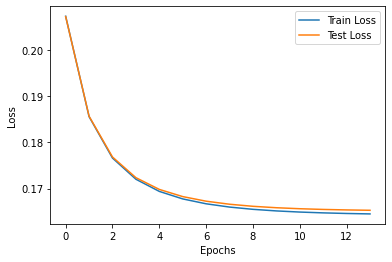

In [383]:
import matplotlib.pyplot as plt
print(len(test_loss_lst))
plt.plot( np.arange(len(train_loss_lst)),  train_loss_lst,  label = "Train Loss")
plt.plot(np.arange(len(test_loss_lst)), test_loss_lst, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()